In [2]:
import pandas as pd
import numpy as np
from time import time

from cobra.io import load_model
from cobra.flux_analysis import (
    single_gene_deletion, single_reaction_deletion, double_gene_deletion,
    double_reaction_deletion)

from cobra.io.json import load_json_model

# cobra_model = load_model("textbook")
cobra_model = load_json_model('toy.json')

# rxn_names stores the name of every reaction in GEM -> list
rxn_names = []
for rxn in cobra_model.reactions: rxn_names.append(rxn.id)

# script for single deletion of every reaction in GEM

df_rxn_del = pd.DataFrame()

for rxn in cobra_model.reactions:
    df_rxn_del[rxn.id] = np.nan

rxn_names = []
growth = []
status = []

for rxn in range(len(cobra_model.reactions)):
    with cobra_model:
        cobra_model.reactions[rxn].knock_out()
        solution =  cobra_model.optimize()
        df_rxn_del.loc[rxn] = solution.fluxes
        rxn_names.append(cobra_model.reactions[rxn].id)
        growth.append(solution.objective_value)
        status.append(solution.status)

df_rxn_del['id'] = rxn_names
df_rxn_del['growth'] = growth
df_rxn_del['status'] = status


# script for double deletions

# df_rxn_double_del = pd.DataFrame()

# for rxn in cobra_model.reactions:
#     df_rxn_double_del[rxn.id] = np.nan

# rxn_names = []
# growth = []
# status = []

# counter = 0
# for rxn_a in range(len(cobra_model.reactions)):
#     for rxn_b in range(rxn_a, len(cobra_model.reactions)):
#         with cobra_model:
#             cobra_model.reactions[rxn_a].knock_out()
#             cobra_model.reactions[rxn_b].knock_out()
#             solution =  cobra_model.optimize()
#             rxn_names.append(cobra_model.reactions[rxn_a].id + ',' + cobra_model.reactions[rxn_b].id)
#             growth.append(solution.objective_value)
#             status.append(solution.status)
            
#             df_rxn_double_del.loc[counter] = solution.fluxes
#             counter = counter + 1            
            
# df_rxn_double_del['id'] = rxn_names
# df_rxn_double_del['growth'] = growth
# df_rxn_double_del['status'] = status


# script for triple deletions

# df_rxn_triple_del = pd.DataFrame()

# for rxn in cobra_model.reactions:
#     df_rxn_triple_del[rxn.id] = np.nan

# rxn_names = []
# growth = []
# status = []

# counter = 0
# for rxn_a in range(len(cobra_model.reactions)):
#     for rxn_b in range(rxn_a, len(cobra_model.reactions)):
#         for rxn_c in range(rxn_b, len(cobra_model.reactions)):
#             with cobra_model:
#                 cobra_model.reactions[rxn_a].knock_out()
#                 cobra_model.reactions[rxn_b].knock_out()
#                 cobra_model.reactions[rxn_c].knock_out()

#                 solution =  cobra_model.optimize()
#                 rxn_names.append(cobra_model.reactions[rxn_a].id + ',' + cobra_model.reactions[rxn_b].id + ',' + cobra_model.reactions[rxn_c].id)
#                 growth.append(solution.objective_value)
#                 status.append(solution.status)
                
#                 df_rxn_triple_del.loc[counter] = solution.fluxes
#                 counter = counter + 1            
            
# df_rxn_triple_del['id'] = rxn_names
# df_rxn_triple_del['growth'] = growth
# df_rxn_triple_del['status'] = status


# Cocnacanate all dfs with deletions
# df = pd.concat([df_rxn_del, df_rxn_double_del, df_rxn_triple_del])
# df = pd.concat([df_rxn_del, df_rxn_double_del])
df = df_rxn_del

Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled


/home/comex/Desktop/python-envs/main-bio/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/comex/Desktop/python-envs/main-bio/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/comex/Desktop/python-envs/main-bio/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/comex/Desktop/python-envs/main-bio/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/comex/Desktop/python-envs/main-bio/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/comex/Desktop/python-envs/main-bio

In [4]:
cobra_model

Name,toy
Memory address,0x07f3f944d4fa0
Number of metabolites,17
Number of reactions,21
Number of groups,0
Objective expression,1.0*OutputX - 1.0*OutputX_reverse_e7472
Compartments,


In [5]:
df

,r1,r3,r2,r4,r5,r6,r7,r8,r9,r10,...,r14,r15,r16,InputA,InputI,OutputX,OutputN,id,growth,status
0,0.0,-0.5,0.500000,1.000000,0.0,1.000000,1.000000,1.0,1.0,0.000000e+00,...,-3.330669e-16,4.440892e-16,1.0,1.0,1.0,3.0,1.0,r1,3.0,infeasible
1,1.0,0.0,1.000000,2.000000,1.0,3.000000,3.000000,3.0,1.0,-1.110223e-16,...,-1.110223e-16,0.000000e+00,2.0,1.0,1.0,9.0,1.0,r3,9.0,optimal
2,1.0,1.0,0.000000,0.000000,3.0,3.000000,3.000000,3.0,1.0,-1.110223e-16,...,-1.110223e-16,0.000000e+00,2.0,1.0,1.0,9.0,1.0,r2,9.0,optimal
3,1.0,1.0,0.000000,0.000000,3.0,3.000000,3.000000,3.0,1.0,-1.110223e-16,...,-1.110223e-16,0.000000e+00,2.0,1.0,1.0,9.0,1.0,r4,9.0,optimal
4,1.0,-0.5,1.500000,3.000000,0.0,3.000000,3.000000,3.0,1.0,-1.110223e-16,...,-1.110223e-16,0.000000e+00,2.0,1.0,1.0,9.0,1.0,r5,9.0,optimal
5,1.0,-0.5,1.500000,3.000000,0.0,3.000000,3.000000,3.0,1.0,-1.110223e-16,...,-1.110223e-16,0.000000e+00,2.0,1.0,1.0,9.0,1.0,r6,9.0,infeasible
6,1.0,-0.5,1.500000,3.000000,0.0,3.000000,3.000000,3.0,1.0,-1.110223e-16,...,-1.110223e-16,0.000000e+00,2.0,1.0,1.0,9.0,1.0,r7,9.0,infeasible
7,1.0,-0.5,1.500000,3.000000,0.0,3.000000,3.000000,3.0,1.0,-1.110223e-16,...,-1.110223e-16,0.000000e+00,2.0,1.0,1.0,9.0,1.0,r8,9.0,infeasible
8,1.0,-0.5,1.500000,3.000000,0.0,3.000000,3.000000,3.0,1.0,-1.110223e-16,...,-1.110223e-16,0.000000e+00,2.0,1.0,1.0,9.0,1.0,r9,9.0,infeasible
9,1.0,-0.5,1.500000,3.000000,0.0,3.000000,3.000000,3.0,1.0,-1.110223e-16,...,-1.110223e-16,0.000000e+00,2.0,1.0,1.0,9.0,1.0,r10,9.0,optimal


In [6]:
# How many optimal - infeasible
df['status'].value_counts()

infeasible    11
optimal       10
Name: status, dtype: int64

In [7]:
dummy_status = pd.get_dummies(df['status'])
dummy_status.drop('optimal',axis=1,inplace=True)

df = pd.concat([df, dummy_status], axis=1)
df.head(3)

,r1,r3,r2,r4,r5,r6,r7,r8,r9,r10,...,r15,r16,InputA,InputI,OutputX,OutputN,id,growth,status,infeasible
0,0.0,-0.5,0.5,1.0,0.0,1.0,1.0,1.0,1.0,0.000000e+00,...,4.440892e-16,1.0,1.0,1.0,3.0,1.0,r1,3.0,infeasible,1
1,1.0,0.0,1.0,2.0,1.0,3.0,3.0,3.0,1.0,-1.110223e-16,...,0.000000e+00,2.0,1.0,1.0,9.0,1.0,r3,9.0,optimal,0
2,1.0,1.0,0.0,0.0,3.0,3.0,3.0,3.0,1.0,-1.110223e-16,...,0.000000e+00,2.0,1.0,1.0,9.0,1.0,r2,9.0,optimal,0


In [8]:
# How many optimal - infeasible
df.drop('status', axis=1, inplace=True)

In [9]:
df_test = df.copy()
df_test.drop(columns=['id', 'growth'], inplace=True)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

from sklearn.linear_model import LogisticRegression

from matplotlib import pyplot as plt

In [11]:
X = df_test.drop(columns='infeasible')
y = df_test['infeasible']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [20]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

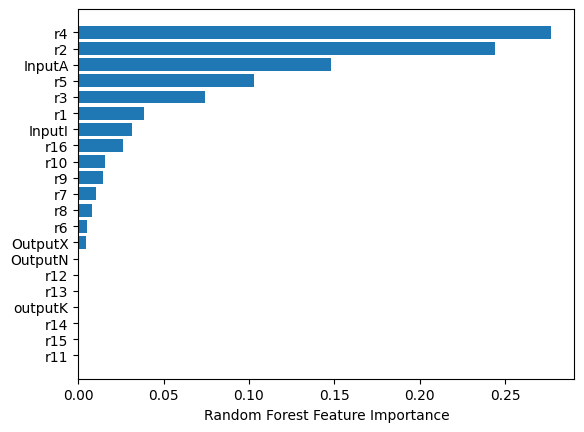

In [21]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()

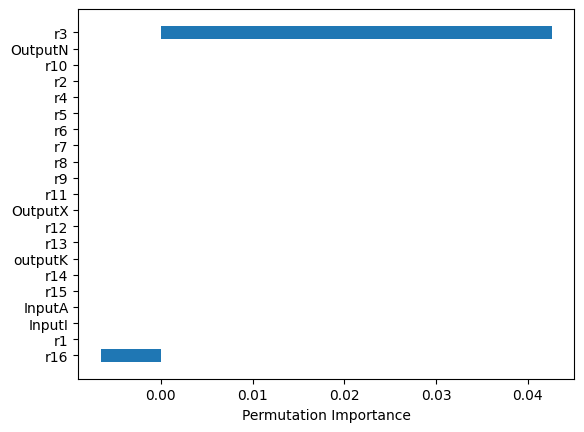

In [22]:
perm_importance = permutation_importance(rf, X_test, y_test)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()